# **1. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Data Loading**

In [ ]:
file_id = '1Mih2TZTok773Xi1FRqY-jxOaX_UsVUyY'
download_url = f'https://drive.google.com/uc?id={file_id}'

data = pd.read_csv(download_url)
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34.0                  48.0  0.99832  3.38       0.86   
4                  6.0                  11.0  0.99892  3.48       0.49   

   alcohol  quality  
0      9.0        3  
1      8.4        3  
2     10.7        3  
3      9.9        3  
4     11.0        3

In [ ]:
print('Informasi dataset:')
data.info()

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


In [ ]:
print('Missing values per fitur:')
print(data.isnull().sum())

Missing values per fitur:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# **3. Exploratory Data Analysis (EDA)**

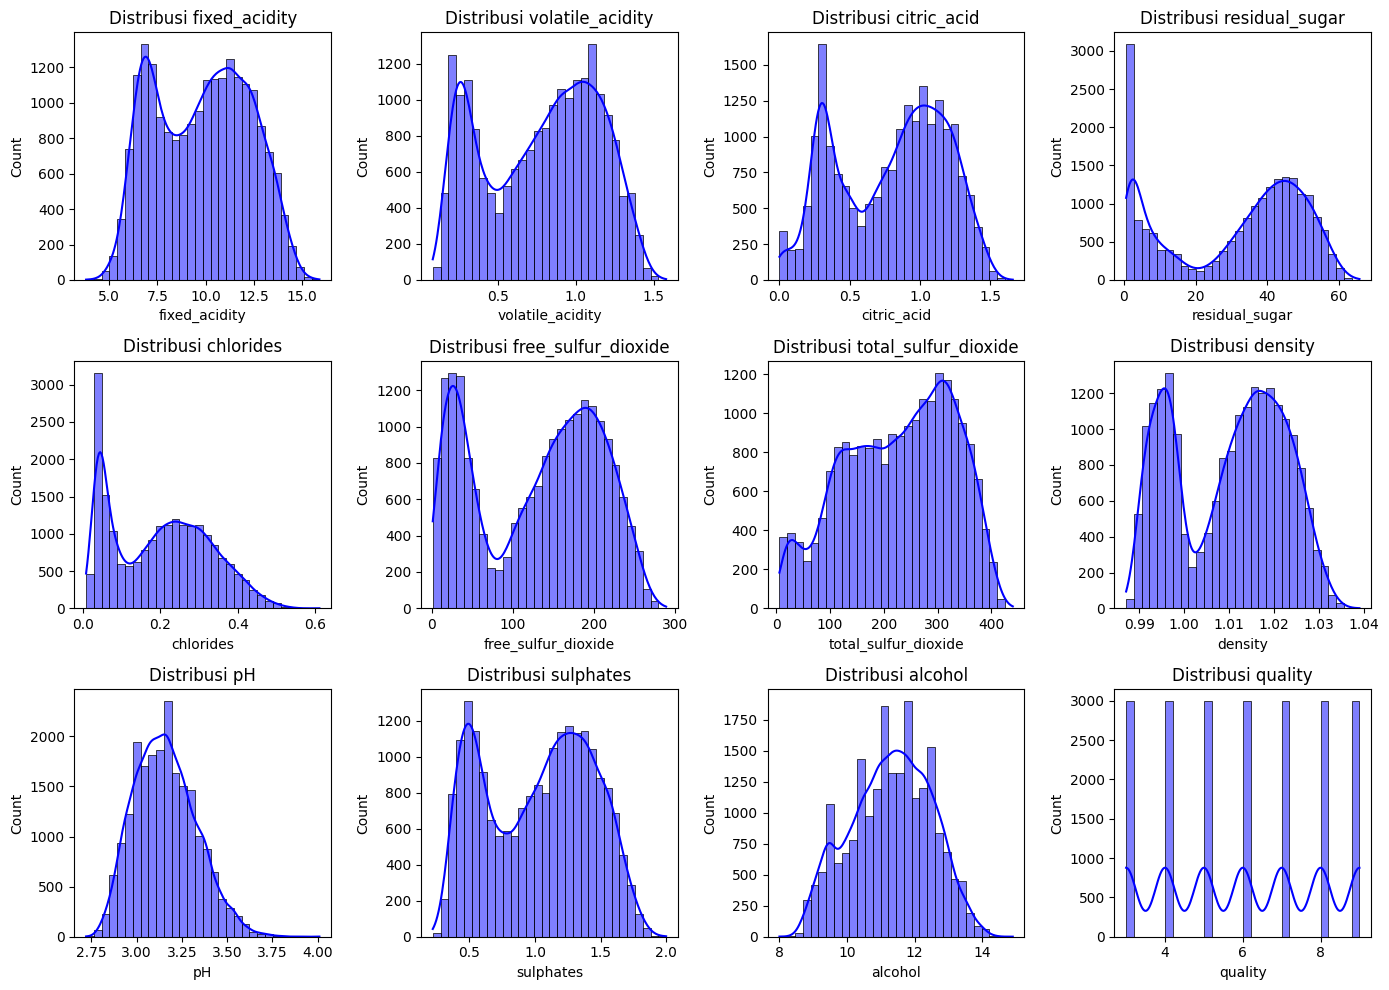

In [ ]:
# Distribusi seluruh fitur
features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))

for i, column in enumerate(features.columns, 1):
  plt.subplot(3, 4, i)
  sns.histplot(data[column], bins=30, kde=True, color='blue')
  plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

<Axes: >

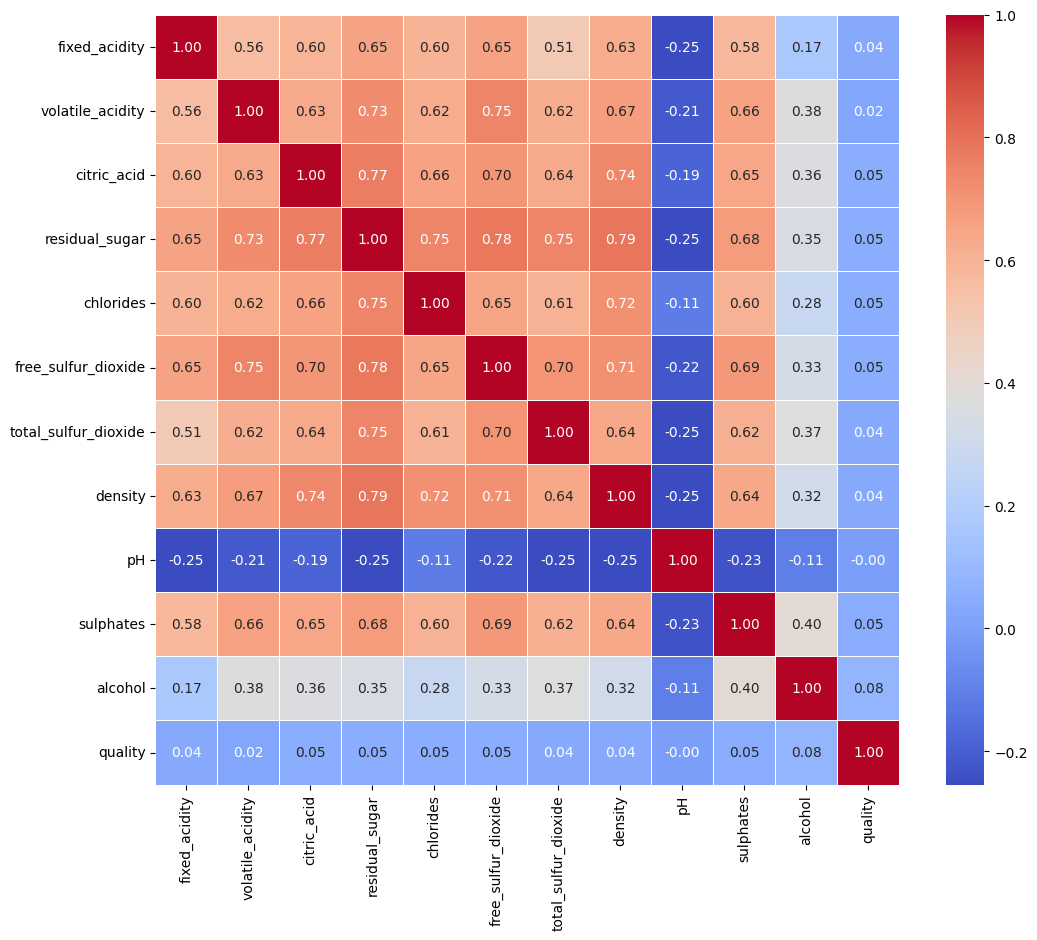

In [ ]:
# Heatmap korelasi antar fitur
plt.figure(figsize=(12, 10))
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

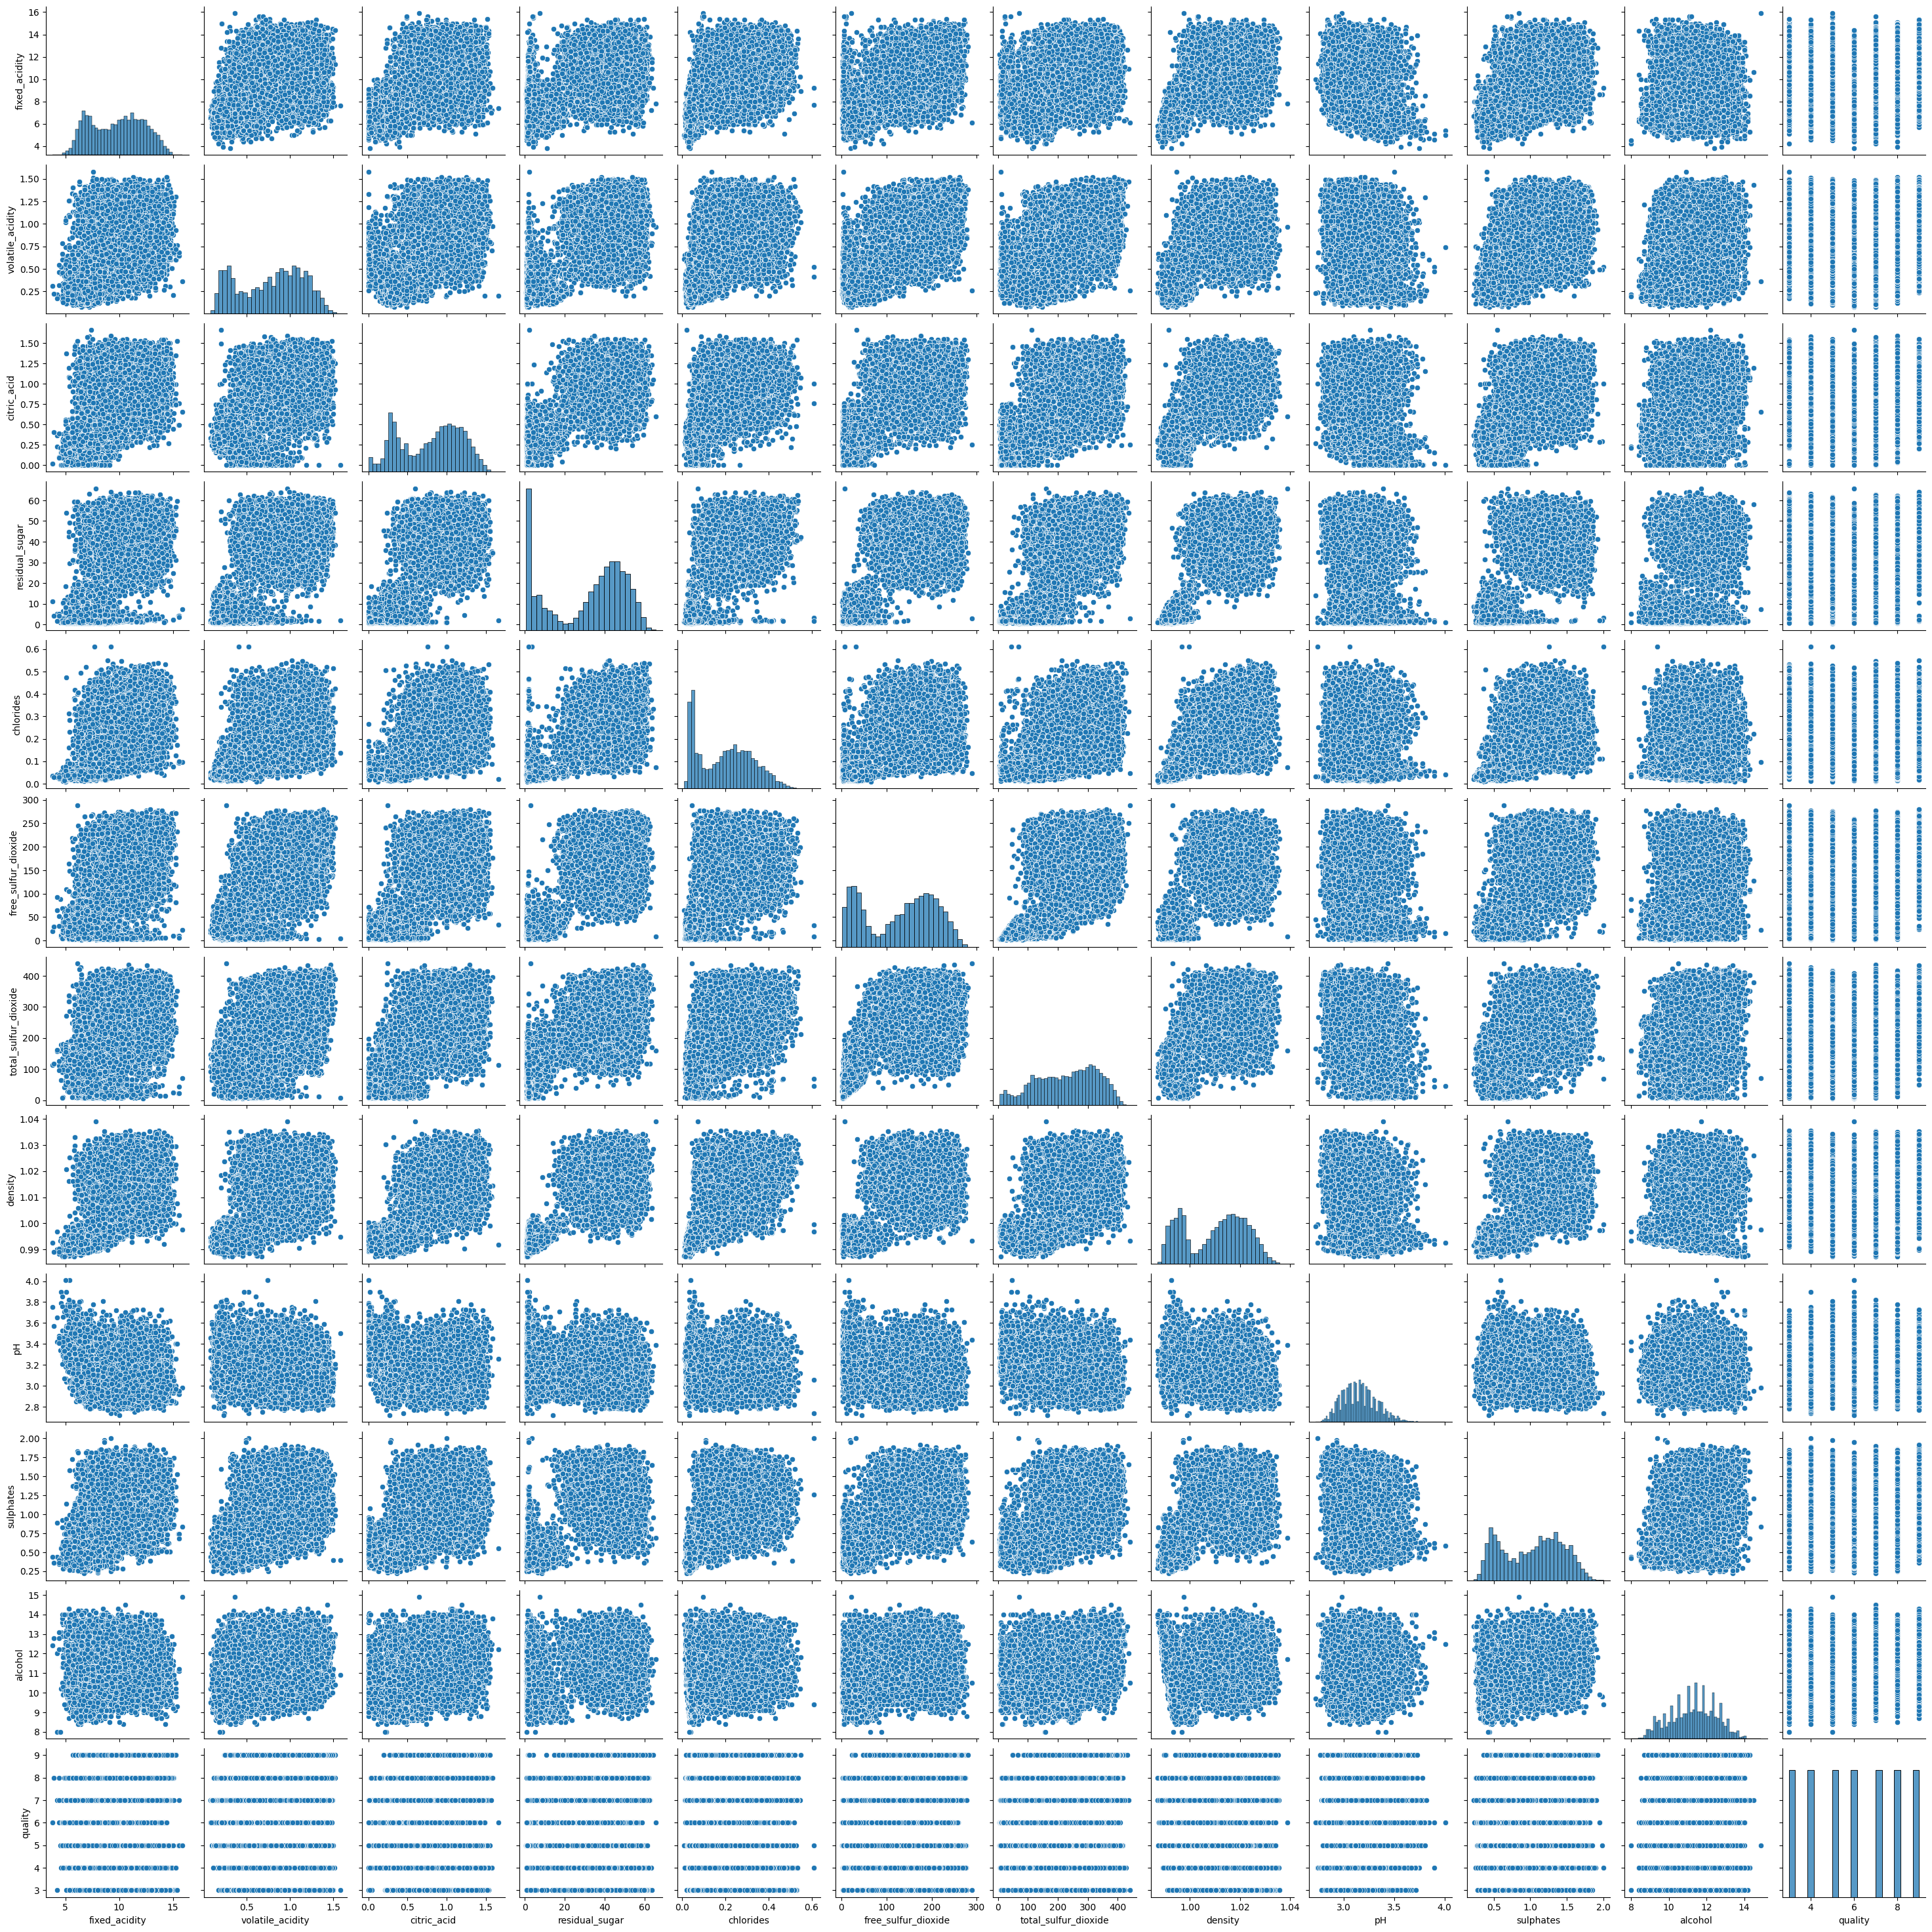

In [ ]:
# Pairplot fitur numerik
sns.pairplot(features)
plt.show()

<ipython-input-8-847d8f39fccf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis')


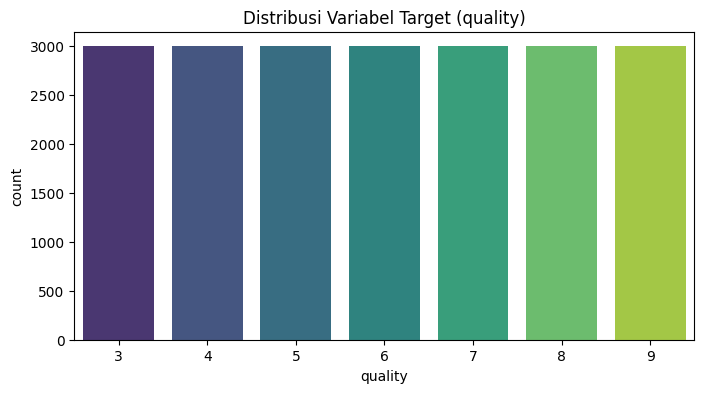

In [ ]:
# Distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribusi Variabel Target (quality)')
plt.show()

# **4. Data Splitting**

In [ ]:
scaler = MinMaxScaler()

# Normalisasi data di semua kolom
numeric_columns = data.select_dtypes(include=['float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['quality'])
y = data['quality']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan bentuk set pelatihan dan set uji untuk memastikan split berhasil
print(f'Training set shape: X_train={X_train.shape}, y_train={y_train.shape}')
print(f'Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}')

Training set shape: X_train=(16800, 11), y_train=(16800,)
Testing set shape: X_test=(4200, 11), y_test=(4200,)


# **5. Model Training**

In [ ]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print('Model training has been completed.')

Model training has been completed.


# **6. Model Evaluation**

**a. KNN**

==== KNN Classifier ====
Confusion Matrix:
[[263  81  10   3  44 102  63]
 [133 242  37  18  44  73  80]
 [ 45  55 283 142  38  28  30]
 [  8  14 144 349  56   4   5]
 [ 97  81  30 105 189  63  60]
 [147  92  14  17  74 206  58]
 [139  98  17   1  64  88 166]]
Accuracy: 0.4043
Precision: 0.4079
Recall: 0.4056
F1-Score: 0.4030

----------------------------------------



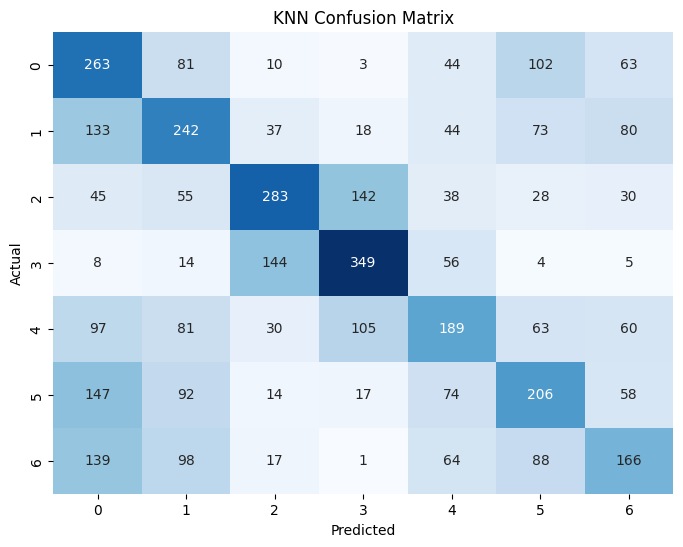

In [ ]:
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print('==== KNN Classifier ====')
print('Confusion Matrix:')
print(cm_knn)
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_knn, average="macro"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_knn, average="macro"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_knn, average="macro"):.4f}')
print('\n' + '-'*40 + '\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**b. Decision Tree**

==== Decision Tree Classifier ====
Confusion Matrix:
[[368  45  18   6  30  47  52]
 [ 46 368  41  10  46  70  46]
 [ 34  29 338 113  33  41  33]
 [  9  17 107 366  61  14   6]
 [ 56  43  41  67 315  50  53]
 [ 43  37  34   9  55 378  52]
 [ 49  48  16   7  36  50 367]]
Accuracy: 0.5952
Precision: 0.5954
Recall: 0.5969
F1-Score: 0.5956

----------------------------------------



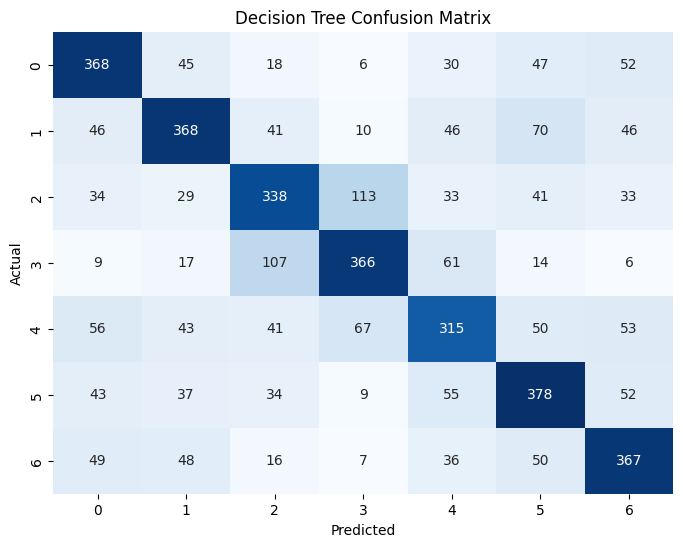

In [ ]:
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print('==== Decision Tree Classifier ====')
print('Confusion Matrix:')
print(cm_dt)
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_dt, average="macro"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_dt, average="macro"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_dt, average="macro"):.4f}')
print('\n' + '-'*40 + '\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**c. Random Forest**

==== Random Forest Classifier ====
Confusion Matrix:
[[388  45   1   1   8  62  61]
 [ 63 382  29  12  14  52  75]
 [ 45  28 353 118   8  33  36]
 [  7   7  86 439  25   8   8]
 [ 89  47   6  82 291  56  54]
 [ 87  40   1  13  33 380  54]
 [ 73  56   0   2  14  53 375]]
Accuracy: 0.6210
Precision: 0.6348
Recall: 0.6236
F1-Score: 0.6203

----------------------------------------



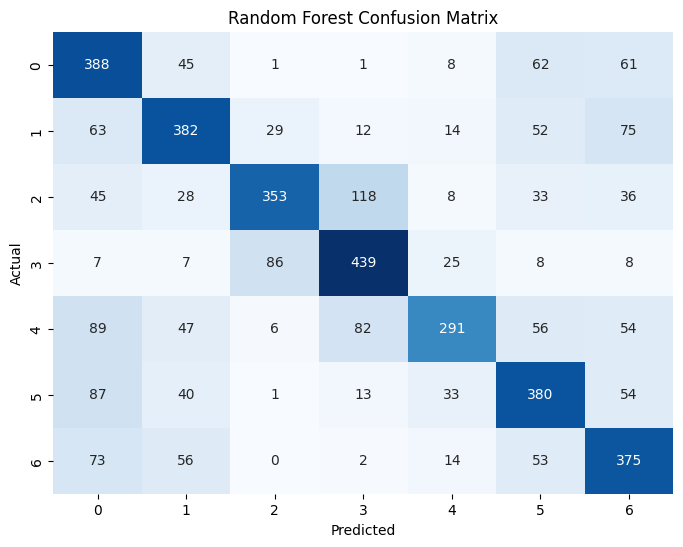

In [ ]:
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print('==== Random Forest Classifier ====')
print('Confusion Matrix:')
print(cm_rf)
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_rf, average="macro"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_rf, average="macro"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_rf, average="macro"):.4f}')
print('\n' + '-'*40 + '\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**d. SVM**

==== SVM Classifier ====
Confusion Matrix:
[[254  52   1   2   0  70 187]
 [230  70  33  13   0  67 214]
 [ 90  22 254 177   0  23  55]
 [ 14   1 117 429   1   3  15]
 [160  52   8 198   4  45 158]
 [235  56   2  38   6  83 188]
 [215  58   0   3   0  58 239]]
Accuracy: 0.3174
Precision: 0.3394
Recall: 0.3242
F1-Score: 0.2861

----------------------------------------



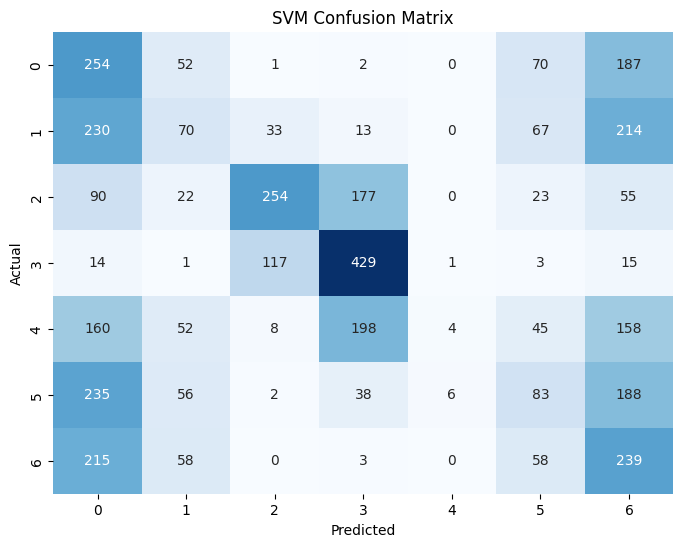

In [ ]:
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('==== SVM Classifier ====')
print('Confusion Matrix:')
print(cm_svm)
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_svm, average="macro"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_svm, average="macro"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_svm, average="macro"):.4f}')
print('\n' + '-'*40 + '\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**e. Naive Bayes**

==== Naive Bayes Classifier ====
Confusion Matrix:
[[164  56   1   2   5  73 265]
 [139  60   1  46  16  67 298]
 [ 60  21   8 422   3  19  88]
 [  8   2   8 539   1   4  18]
 [ 93  49   5 205   3  47 223]
 [178  59   0  46  13  65 247]
 [155  62   0   3  10  65 278]]
Accuracy: 0.2660
Precision: 0.2315
Recall: 0.2749
F1-Score: 0.2006

----------------------------------------



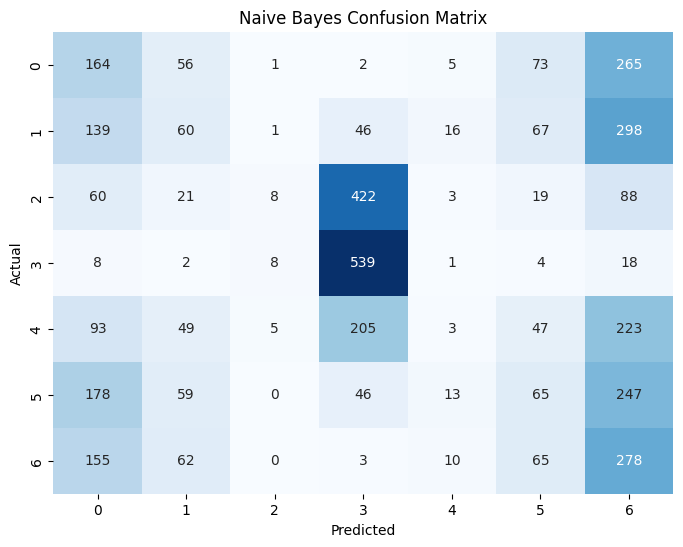

In [ ]:
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print('==== Naive Bayes Classifier ====')
print('Confusion Matrix:')
print(cm_nb)
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_nb, average="macro"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_nb, average="macro"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_nb, average="macro"):.4f}')
print('\n' + '-'*40 + '\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Rangkuman Hasil**

In [ ]:
# Evaluasi dan mengembalikan hasil sebegai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
      'Confusion Matrix': cm,
      'Accuracy': accuracy_score(y_test, y_pred),
      'Precision': precision_score(y_test, y_pred, average='macro'),
      'Recall': recall_score(y_test, y_pred, average='macro'),
      'F1-Score': f1_score(y_test, y_pred, average='macro')
  }
  return results

# Evaluasi setiap model dan mengambil hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Membuat DataFrame untuk merangkum hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Menggabungkan DataFrame dengan hasilnya masing-masing
rows = []
for model_name, metrics in results.items():
  rows.append({
      'Model': model_name,
      'Accuracy': metrics['Accuracy'],
      'Precision': metrics['Precision'],
      'Recall': metrics['Recall'],
      'F1-Score': metrics['F1-Score']
  })

# Mengubah list dari dictionary ke dalam DataFrame
summary_df = pd.DataFrame(rows)

# Menampilkan hasil DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.404286   0.407938  0.405570  0.403028
1            Decision Tree (DT)  0.595238   0.595358  0.596945  0.595618
2            Random Forest (RF)  0.620952   0.634752  0.623593  0.620300
3  Support Vector Machine (SVM)  0.317381   0.339396  0.324156  0.286126
4              Naive Bayes (NB)  0.265952   0.231532  0.274930  0.200574
